In [21]:
import pandas as pd
import numpy as np
import warnings

In [22]:
warnings.filterwarnings("ignore")

In [23]:
car_sales = pd.read_csv("./data/sale_dataset.csv")
car_sales

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [24]:
car_sales.dtypes,len(car_sales)

(Manufacturer            object
 Model                   object
 Sales_in_thousands     float64
 __year_resale_value    float64
 Vehicle_type            object
 Price_in_thousands     float64
 Engine_size            float64
 Horsepower             float64
 Wheelbase              float64
 Width                  float64
 Length                 float64
 Curb_weight            float64
 Fuel_capacity          float64
 Fuel_efficiency        float64
 Latest_Launch           object
 Power_perf_factor      float64
 dtype: object,
 157)

In [25]:
car_sales['Latest_Launch'].value_counts() #it is not clear categorical
car_sales = car_sales.drop(['Latest_Launch','Sales_in_thousands','__year_resale_value','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Power_perf_factor'],axis=1)
car_sales.head()

,Manufacturer,Model,Vehicle_type,Price_in_thousands,Engine_size,Fuel_efficiency
0,Acura,Integra,Passenger,21.50,1.8,28.0
1,Acura,TL,Passenger,28.40,3.2,25.0
2,Acura,CL,Passenger,NaN,3.2,26.0
3,Acura,RL,Passenger,42.00,3.5,22.0
4,Audi,A4,Passenger,23.99,1.8,27.0


# Optimizing data for better results
<br>
<br>


<li> Removing or Reducing dimensions for better accuracy and prevent overfitting of the model

In [26]:
# car_sales.drop(["Manufacturer","Model","__year_resale_value","Engine_size","Wheelbase","Width","Curb_weight"],axis =1,inplace =True)

In [27]:
car_sales

,Manufacturer,Model,Vehicle_type,Price_in_thousands,Engine_size,Fuel_efficiency
0,Acura,Integra,Passenger,21.50,1.8,28.0
1,Acura,TL,Passenger,28.40,3.2,25.0
2,Acura,CL,Passenger,NaN,3.2,26.0
3,Acura,RL,Passenger,42.00,3.5,22.0
4,Audi,A4,Passenger,23.99,1.8,27.0
...,...,...,...,...,...,...
152,Volvo,V40,Passenger,24.40,1.9,25.0
153,Volvo,S70,Passenger,27.50,2.4,25.0
154,Volvo,V70,Passenger,28.80,2.4,25.0
155,Volvo,C70,Passenger,45.50,2.3,23.0


# Cleaning Data

In [28]:
# column_means = car_sales.mean(axis=0)
# column_means
# car_sales['Sales_in_thousands'].mean()


In [29]:
for col in car_sales.columns:
    if car_sales[col].dtypes == 'float64':
        car_sales[col] = car_sales[col].fillna(car_sales[col].mean())
    else :
        car_sales[col].dropna()

In [30]:
car_sales.head()

,Manufacturer,Model,Vehicle_type,Price_in_thousands,Engine_size,Fuel_efficiency
0,Acura,Integra,Passenger,21.500000,1.8,28.0
1,Acura,TL,Passenger,28.400000,3.2,25.0
2,Acura,CL,Passenger,27.390755,3.2,26.0
3,Acura,RL,Passenger,42.000000,3.5,22.0
4,Audi,A4,Passenger,23.990000,1.8,27.0


In [31]:
car_sales.isna().sum() #all null values resolved

Manufacturer          0
Model                 0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Fuel_efficiency       0
dtype: int64

In [32]:
# spliting into X and Y
X = car_sales.drop("Price_in_thousands",axis =1)# all other factors are used for estimation

In [33]:
Y = car_sales["Price_in_thousands"] # Estimate the Power_Performance Factor

In [34]:
X.head()

,Manufacturer,Model,Vehicle_type,Engine_size,Fuel_efficiency
0,Acura,Integra,Passenger,1.8,28.0
1,Acura,TL,Passenger,3.2,25.0
2,Acura,CL,Passenger,3.2,26.0
3,Acura,RL,Passenger,3.5,22.0
4,Audi,A4,Passenger,1.8,27.0


In [35]:
Y.head()

0    21.500000
1    28.400000
2    27.390755
3    42.000000
4    23.990000
Name: Price_in_thousands, dtype: float64

# Encoding Categorical Data


In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

category = ["Vehicle_type","Model","Manufacturer"]#categorical labels
one_hot = OneHotEncoder() # instantiation
trans = ColumnTransformer([('one_hot',
                            one_hot,
                            category
                           )],remainder ='passthrough') # instantiation


X_new = trans.fit_transform(X) 


In [37]:
import pickle
with open("./Trained_Model/encoder", "wb") as f: 
    pickle.dump(X_new, f)

In [38]:
# df = pd.DataFrame(trans.fit_transform(X).toarray()) #as it was giving tupple
# pd.DataFrame(trans.fit_transform(X))
# df
X_new_sparse = trans.fit_transform(X)  # Outputs a sparse matrix
X_new_dense = X_new_sparse.toarray()  # Convert sparse matrix to dense array

X_new = trans.fit_transform(X)

print(X_new)

  (0, 1)	1.0
  (0, 81)	1.0
  (0, 158)	1.0
  (0, 188)	1.8
  (0, 189)	28.0
  (1, 1)	1.0
  (1, 145)	1.0
  (1, 158)	1.0
  (1, 188)	3.2
  (1, 189)	25.0
  (2, 1)	1.0
  (2, 27)	1.0
  (2, 158)	1.0
  (2, 188)	3.2
  (2, 189)	26.0
  (3, 1)	1.0
  (3, 117)	1.0
  (3, 158)	1.0
  (3, 188)	3.5
  (3, 189)	22.0
  (4, 1)	1.0
  (4, 10)	1.0
  (4, 159)	1.0
  (4, 188)	1.8
  (4, 189)	27.0
  :	:
  (152, 1)	1.0
  (152, 150)	1.0
  (152, 187)	1.0
  (152, 188)	1.9
  (152, 189)	25.0
  (153, 1)	1.0
  (153, 127)	1.0
  (153, 187)	1.0
  (153, 188)	2.4
  (153, 189)	25.0
  (154, 1)	1.0
  (154, 151)	1.0
  (154, 187)	1.0
  (154, 188)	2.4
  (154, 189)	25.0
  (155, 1)	1.0
  (155, 26)	1.0
  (155, 187)	1.0
  (155, 188)	2.3
  (155, 189)	23.0
  (156, 1)	1.0
  (156, 128)	1.0
  (156, 187)	1.0
  (156, 188)	2.9
  (156, 189)	24.0


 <b> Alternate method :</b>

In [39]:
dum = pd.get_dummies(car_sales[["Vehicle_type"]])
dum

,Vehicle_type_Car,Vehicle_type_Passenger
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
152,False,True
153,False,True
154,False,True
155,False,True


# Dividing Dataset

In [40]:
#Split into training and testing
from sklearn.model_selection import train_test_split

In [41]:
np.random.seed(29)
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,test_size=0.3)

In [42]:
type(X_train),type(Y_train)

(scipy.sparse._csr.csr_matrix, pandas.core.series.Series)

# Training a Regression Model

In [43]:
# Building a regressor
from sklearn.ensemble import RandomForestRegressor 

In [44]:
model = RandomForestRegressor() #instantiation

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    # ('preprocessing', trans),
    ('regressor', RandomForestRegressor())
])

# Define the hyperparameters grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'regressor__max_depth': [None, 10, 20],       # Maximum depth of the tree
    # Add more hyperparameters to tune here...
}

# Instantiate the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=9, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_new,Y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
# print("Best Score:", best_score)

KeyboardInterrupt: 

In [ ]:
best_model = grid_search.best_estimator_
val_score = best_model.score(X_test, Y_test)
val_score

0.9450626974049953

In [ ]:
# model.fit(X_train,Y_train)

In [ ]:
# model.score(X_test,Y_test) 

<b> Good Regression Model as its score closer to 1 </b>

<li> Results are Accurate and Thus we can say the Predictions by the model have high Probablity of being True values

In [ ]:
Y_predict = best_model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

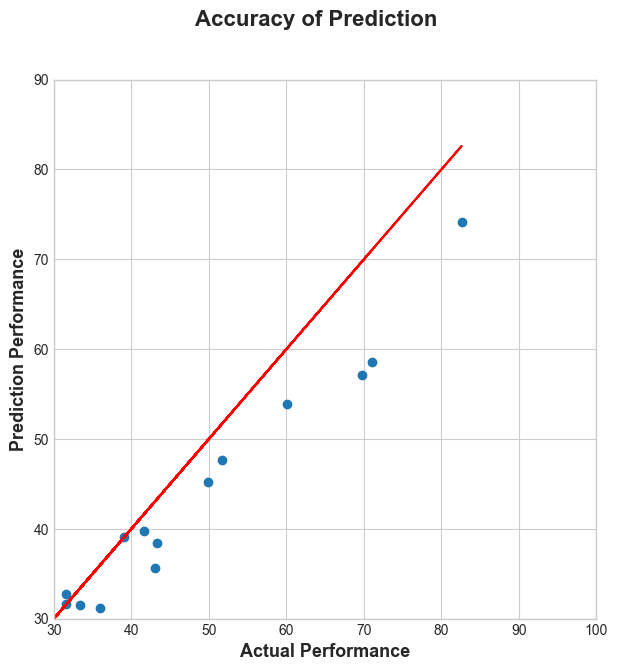

In [ ]:
plt.style.use("seaborn-whitegrid")
fig,ax = plt.subplots(figsize=(7,7))
ax.scatter(Y_test,Y_predict)
ax.set_xlim([30,100])
ax.set_ylim([30,90])
# ax.set(xlabel="Actual",ylabel="Predicted")
ax.plot(Y_test,Y_test,c="red")
ax.set_xlabel("Actual Performance",fontweight = "bold",fontsize=13)
ax.set_ylabel("Prediction Performance",fontweight = "bold",fontsize=13)
fig.suptitle("Accuracy of Prediction",fontweight = "bold",fontsize=16);


In [ ]:
import pickle

In [ ]:
pickle.dump(best_model,open('./Trained_Model/Car_Performance_Model.pkl','wb'))


In [ ]:
fig.savefig('PerformaceModel.png')